<a href="https://colab.research.google.com/github/Ravi-Nikam/ML/blob/main/Flight_Fare_pre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
data=pd.read_excel('/content/drive/MyDrive/ML/ML_Data_set/Flight_Fare_Train_data.xlsx')
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897


In [ ]:
data.isnull().sum()   

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
data.dropna(axis=0,inplace=True)
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

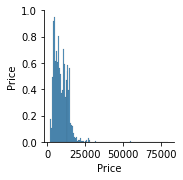

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(data,hue=None)
plt.show()

In [ ]:
data['jour_day']=pd.to_datetime(data.Date_of_Journey,format="%d/%m/%Y").dt.day
data['jour_month']=pd.to_datetime(data.Date_of_Journey,format="%d/%m/%Y").dt.month
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,jour_day,jour_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3


In [ ]:
data['jour_dep_hour']=pd.to_datetime(data.Dep_Time).dt.hour
data['jour_dep_minu']=pd.to_datetime(data.Dep_Time).dt.minute
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,jour_day,jour_month,jour_dep_hour,jour_dep_minu
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20


In [ ]:
data['jour_Ari_hour']=pd.to_datetime(data.Arrival_Time).dt.hour
data['jour_Ari_minu']=pd.to_datetime(data.Arrival_Time).dt.minute

data.drop(['Date_of_Journey','Dep_Time','Arrival_Time'],inplace=True,axis=1)

In [ ]:
data.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,jour_day,jour_month,jour_dep_hour,jour_dep_minu,jour_Ari_hour,jour_Ari_minu
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10


In [ ]:
dur_=[]
dur_=list(data['Duration'])
dur_hour=[]
dur_minu=[]
for i in range(len(data['Duration'])):
  if len(dur_[i].split())!=2:
    if "h" in dur_[i]:
      dur_[i]=dur_[i].strip( )+ " 0m"
    else:
      dur_[i]="0h "+dur_[i]

In [ ]:
#dur_[0].split("h")[0]
#dur_[0].split("m")[0].split()[-1]
for i in range(len(data['Duration'])):
  dur_hour.append(int(dur_[i].split("h")[0]))
  dur_minu.append(int(dur_[i].split("m")[0].split()[-1]))

In [ ]:
data['dur_hour']=dur_hour
data['dur_minu']=dur_minu

In [ ]:
data.drop('Duration',axis=1,inplace=True)
data.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,jour_day,jour_month,jour_dep_hour,jour_dep_minu,jour_Ari_hour,jour_Ari_minu,dur_hour,dur_minu
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50


In [ ]:
data.describe()

,Price,jour_day,jour_month,jour_dep_hour,jour_dep_minu,jour_Ari_hour,jour_Ari_minu,dur_hour,dur_minu
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,9087.214567,13.509081,4.708575,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624
std,4611.548810,8.479363,1.164408,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817
min,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,8372.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


In [ ]:
data.drop(['Additional_Info','Route'],inplace=True,axis=1)

In [ ]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price', 'jour_day',
       'jour_month', 'jour_dep_hour', 'jour_dep_minu', 'jour_Ari_hour',
       'jour_Ari_minu', 'dur_hour', 'dur_minu'],
      dtype='object')

In [ ]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

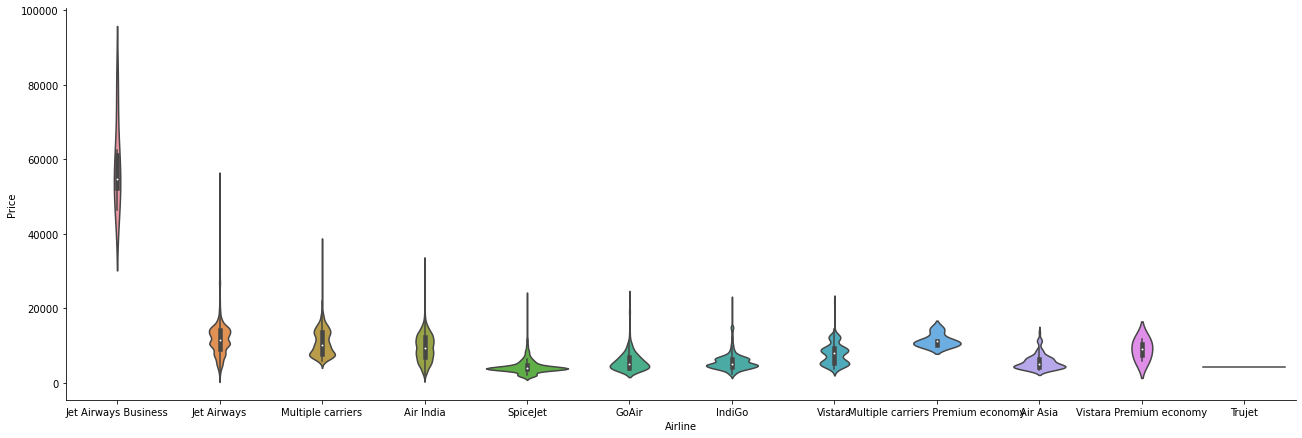

In [ ]:
#sns.catplot(y="Price",x="Airline",data=data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
sns.catplot(y="Price",x="Airline",data=data.sort_values("Price",ascending=False),kind="violin",height=6,aspect=3)
plt.show()

In [ ]:
Airline=data['Airline']
Airline=pd.get_dummies(data['Airline'],drop_first=False)
Airline.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
source=data['Source']
source=pd.get_dummies(data['Source'],drop_first=False)
source.head()

,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [ ]:
destination=data['Destination']
destination=pd.get_dummies(data['Destination'],drop_first=False)
destination.head(1)

,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,0,1


In [ ]:
data['Total_Stops'].value_counts()
data.replace({"1 stop":1,"non-stop":2,"2 stops":3,"3 stops":4,"4 stops":5},inplace=True)
data.head(2)

,Airline,Source,Destination,Total_Stops,Price,jour_day,jour_month,jour_dep_hour,jour_dep_minu,jour_Ari_hour,jour_Ari_minu,dur_hour,dur_minu
0,IndiGo,Banglore,New Delhi,2,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,3,7662,1,5,5,50,13,15,7,25


In [ ]:
data=pd.concat([data,Airline,source,destination],axis=1)
data.head(2)

,Airline,Source,Destination,Total_Stops,Price,jour_day,jour_month,jour_dep_hour,jour_dep_minu,jour_Ari_hour,jour_Ari_minu,dur_hour,dur_minu,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,2,3897,24,3,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,3,7662,1,5,5,50,13,15,7,25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [ ]:
data.drop(['Airline','Source','Destination'],inplace=True,axis=1)

In [ ]:
data.head()

,Total_Stops,Price,jour_day,jour_month,jour_dep_hour,jour_dep_minu,jour_Ari_hour,jour_Ari_minu,dur_hour,dur_minu,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,2,3897,24,3,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,3,7662,1,5,5,50,13,15,7,25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,3,13882,9,6,9,25,4,25,19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [ ]:
data.shape

(10682, 33)

In [ ]:
data_test=pd.read_excel('/content/drive/MyDrive/ML/ML_Data_set/Flight_Fare_Test_data.xlsx')
data_test.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info


In [ ]:
data_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [ ]:
data_test.dropna(axis=0,inplace=True)
data_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [ ]:
#sns.pairplot(data_test,hue=None)
#plt.show()

In [ ]:
data_test['jour_day']=pd.to_datetime(data_test.Date_of_Journey,format="%d/%m/%Y").dt.day
data_test['jour_month']=pd.to_datetime(data_test.Date_of_Journey,format="%d/%m/%Y").dt.month
data_test.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,jour_day,jour_month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6


In [ ]:
data_test['jour_dep_hour']=pd.to_datetime(data_test.Dep_Time).dt.hour
data_test['jour_dep_minu']=pd.to_datetime(data_test.Dep_Time).dt.minute
data_test.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,jour_day,jour_month,jour_dep_hour,jour_dep_minu
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30


In [ ]:
data_test['jour_Ari_hour']=pd.to_datetime(data_test.Arrival_Time).dt.hour
data_test['jour_Ari_minu']=pd.to_datetime(data_test.Arrival_Time).dt.minute

data_test.drop(['Date_of_Journey','Dep_Time','Arrival_Time'],inplace=True,axis=1)

In [ ]:
dur_=[]
dur_=list(data_test['Duration'])
dur_hour=[]
dur_minu=[]
for i in range(len(data_test['Duration'])):
  if len(dur_[i].split())!=2:
    if "h" in dur_[i]:
      dur_[i]=dur_[i].strip( )+ " 0m"
    else:
      dur_[i]="0h "+dur_[i]

In [ ]:
#dur_[0].split("h")[0]
#dur_[0].split("m")[0].split()[-1]
for i in range(len(data_test['Duration'])):
  dur_hour.append(int(dur_[i].split("h")[0]))
  dur_minu.append(int(dur_[i].split("m")[0].split()[-1]))

In [ ]:
data_test['dur_hour']=dur_hour
data_test['dur_minu']=dur_minu

In [ ]:
data_test.drop('Duration',axis=1,inplace=True)
data_test.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,jour_day,jour_month,jour_dep_hour,jour_dep_minu,jour_Ari_hour,jour_Ari_minu,dur_hour,dur_minu
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55


In [ ]:
data_test.drop(['Additional_Info','Route'],inplace=True,axis=1)

In [ ]:
data_test["Airline"].value_counts()
Airline_test=[]
Airline_test=pd.get_dummies(data_test["Airline"] + "test_airline",drop_first=False)
Source_test=[]
Source_test = pd.get_dummies(data_test["Source"] + "test_Source" ,drop_first=False)
Destination_test=[]
Destination_test=pd.get_dummies(data_test["Destination"]+ "test_Destination" ,drop_first=False)


In [ ]:
data_test["Total_Stops"].value_counts()
data_test.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

data_test.head()
testing_data=pd.concat([data_test,Airline_test,Source_test,Destination_test],axis=1)


In [ ]:
testing_data.drop(["Airline","Source","Destination"],axis=1,inplace=True)

testing_data.shape

testing_data.columns
testing_data.head()

testing_data.columns
testing_data.shape

data.columns


Index(['Total_Stops', 'Price', 'jour_day', 'jour_month', 'jour_dep_hour',
       'jour_dep_minu', 'jour_Ari_hour', 'jour_Ari_minu', 'dur_hour',
       'dur_minu', 'Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Banglore', 'Chennai', 'Delhi', 'Kolkata',
       'Mumbai', 'Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi'],
      dtype='object')

In [ ]:
x=data.loc[:,['Total_Stops', 'Price', 'jour_day', 'jour_month', 'jour_dep_hour',
       'jour_dep_minu', 'jour_Ari_hour', 'jour_Ari_minu', 'dur_hour',
       'dur_minu', 'Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Banglore', 'Chennai', 'Delhi', 'Kolkata',
       'Mumbai', 'Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi']]

In [ ]:
x.head()

,Total_Stops,Price,jour_day,jour_month,jour_dep_hour,jour_dep_minu,jour_Ari_hour,jour_Ari_minu,dur_hour,dur_minu,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Banglore,Chennai,Delhi,Delhi,Kolkata,Kolkata,Mumbai,Banglore,Banglore,Cochin,Delhi,Delhi,Hyderabad,Kolkata,Kolkata,New Delhi
0,2,3897,24,3,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,3,7662,1,5,5,50,13,15,7,25,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
2,3,13882,9,6,9,25,4,25,19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
#index location 1(price)
y=data.iloc[:,1]
y.head()


0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

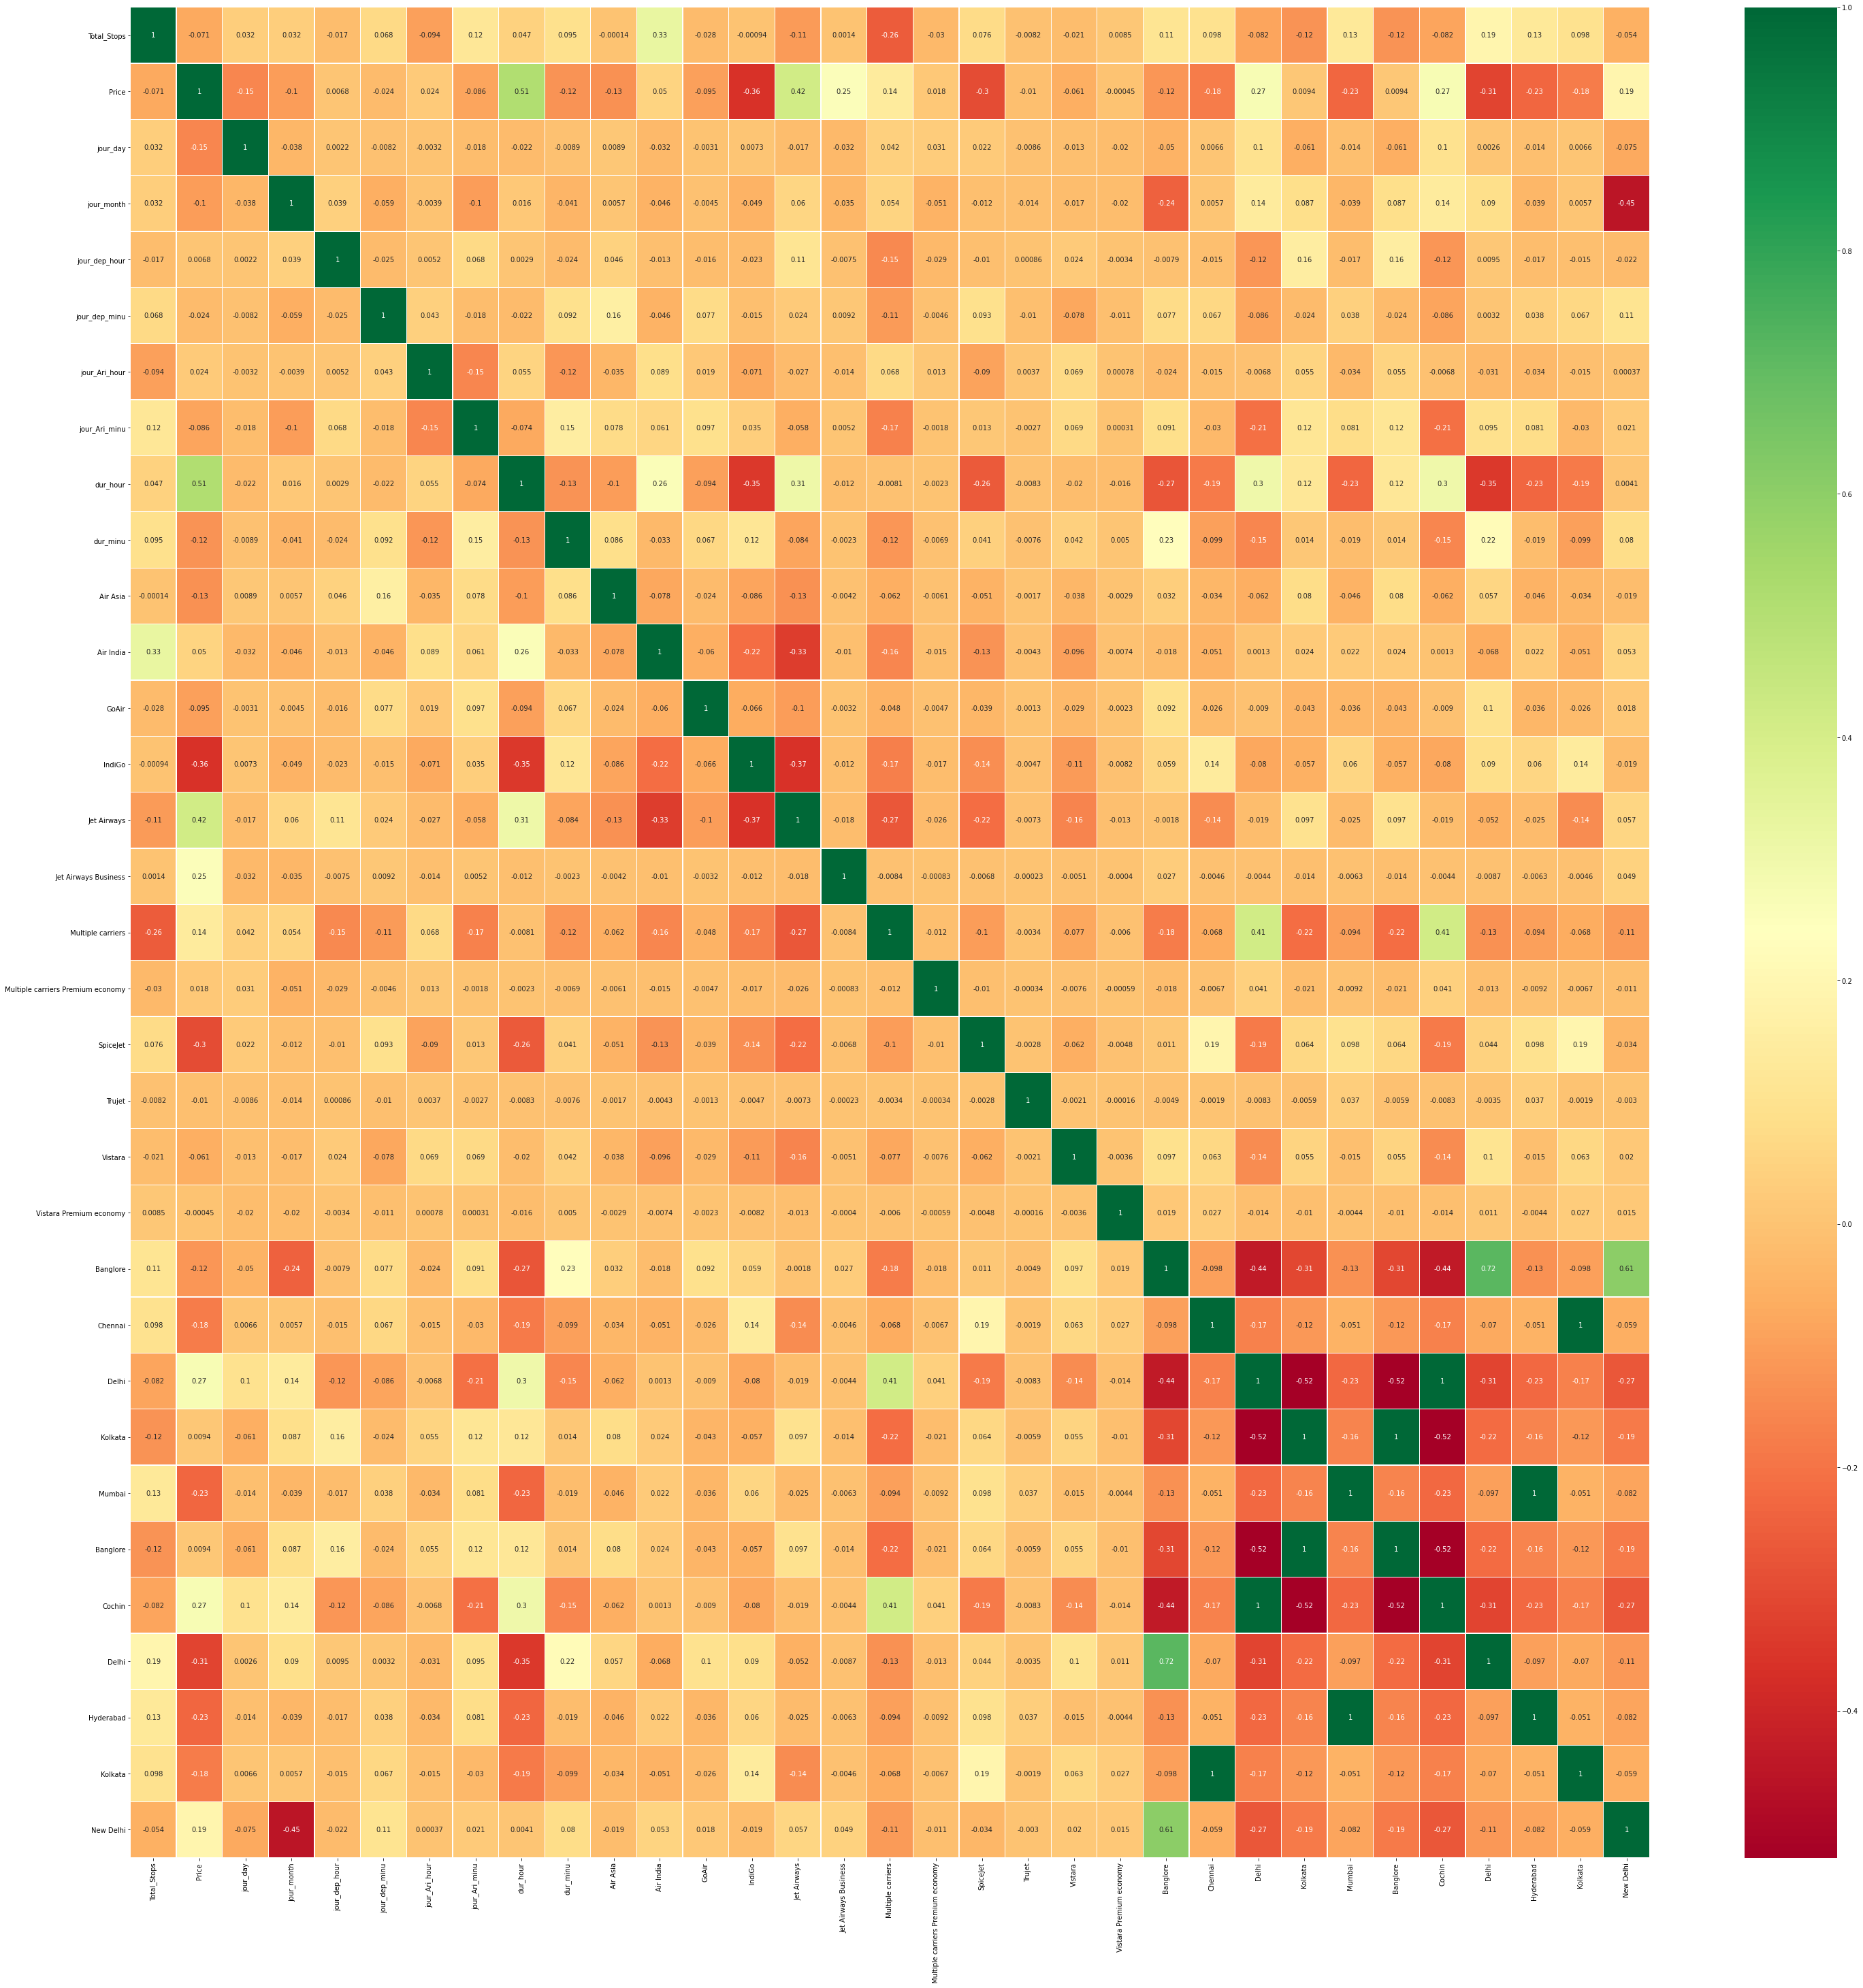

In [ ]:
plt.figure(figsize=(50,50))
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn",linewidths=0.30)
plt.show()

<Figure size 3600x3600 with 0 Axes>

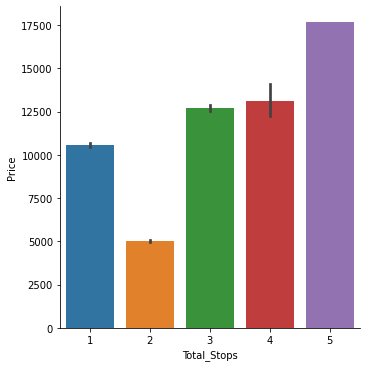

In [ ]:
plt.figure(figsize=(50,50))
sns.catplot(x='Total_Stops',y='Price',data=data,kind='bar')
plt.show()

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor 

In [ ]:
selec=ExtraTreesRegressor()
selec.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
print("Importance Features==>>",selec.feature_importances_)

Importance Features==>> [2.40287783e-02 6.71345803e-01 3.93372756e-03 1.48505361e-03
 2.80566933e-04 1.32602403e-04 2.45994355e-04 1.22767995e-04
 9.25990475e-02 3.68204800e-04 2.62012724e-05 2.15688153e-03
 1.03880868e-05 7.37715538e-03 1.10117043e-01 3.23586376e-02
 3.28963255e-03 4.94710059e-08 1.70887170e-04 1.04825660e-09
 3.35180794e-04 4.03280787e-08 6.98039369e-04 8.49291091e-05
 3.56367691e-05 4.10337603e-03 1.09115288e-02 6.06924678e-05
 6.10915628e-06 3.87085538e-03 8.40890204e-04 1.68408252e-04
 8.55023839e-03 2.57061088e-03 9.77250983e-03 4.88515798e-03
 1.13808500e-04 1.98420164e-05 2.92272205e-03]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_for=RandomForestClassifier(n_estimators=30,random_state=0)
rnd_for.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pre=rnd_for.predict(x_test)

In [ ]:
#from sklearn.metrics import confusion_matrix,classification_report
#cnm=confusion_matrix(y_test,y_pre)
#print(cnm)
#print(classification_report(y_test,y_pre))

In [ ]:
from sklearn import metrics
acu=rnd_for.score(x_train,y_train)
print(acu*100)

99.94148624926858


In [ ]:
acu_tst=rnd_for.score(x_test,y_test)
print(acu*100)

99.94148624926858


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,p=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pre2=knn.predict(x_test)

In [ ]:
acu=knn.score(x_train,y_train)
print(acu*100)

79.48507899356349


In [ ]:
acu=knn.score(x_test,y_test)
print(acu*100)

70.3790360318203


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


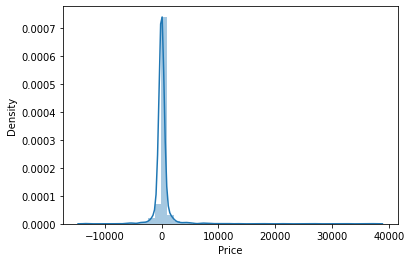

In [ ]:
sns.distplot(y_test-y_pre)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


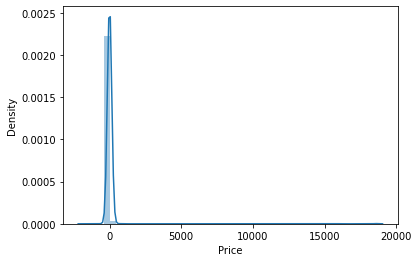

In [ ]:
sns.distplot(y_test-y_pre2)
plt.show()

In [ ]:
from sklearn import metrics

In [ ]:
import numpy as np
print("MAE",metrics.mean_absolute_error(y_test,y_pre))
print("MSE",metrics.mean_squared_error(y_test,y_pre))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pre)))

MAE 461.31867103416005
MSE 4014237.2204024335
RMSE 2003.556143561351


In [ ]:
print(703.9831/(max(y)-min(y)))

0.009054095661903721


In [ ]:
metrics.r2_score(y_test,y_pre)

0.8289132981448345

In [ ]:
metrics.r2_score(y_test,y_pre2)

0.9788778679769451